In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os
from tqdm import tqdm
from scipy.optimize import curve_fit

from scipy.stats import pearsonr

In [81]:
def lin_func(x, a, b):
    return a * x + b


def quadratic(x, a, k, b):
    return a * (x - k) ** 2 + b

In [2]:
df_ = pd.read_csv("./data/level_1_field.csv", index_col=0).V3

In [19]:
%%time
field_df = pd.read_csv(os.path.join("./data", "level_1_field.csv"))

k = {50, 76, 72, 138, 146, 189, 196, 219, 233, 244, 253, 266}

Names = []
Ref_as = []
D_N_s = []
Num_s = []

for idx, row in tqdm(field_df.iloc[:].iterrows()):

    if idx in k:
        continue

    id = row["V1"]
    nm = row['V3'].replace(' ', '_')

    #print(nm, idx, int(idx * 100 / len(field_df)))

    df = pd.read_csv(os.path.join("./data", 'age_kw', nm + '_age_kw_stacked.csv'))
    df = df[(df['time'] > 1970) & (df['time'] < 2015)]
    df = df[df['cite_num'] > 5]
    D_N_c = pearsonr(df['dvalue'], df['new_kw']).statistic
    D_N_p = pearsonr(df['dvalue'], df['new_kw']).pvalue
    ref_a = -df['avg_ref'].mean()

    if D_N_p < 0.05:
        Names.append(nm)
        Ref_as.append(ref_a)
        D_N_s.append(D_N_c)
        Num_s.append(np.log(len(df)))


284it [01:16,  3.71it/s]

CPU times: user 1min 8s, sys: 7.16 s, total: 1min 15s
Wall time: 1min 16s


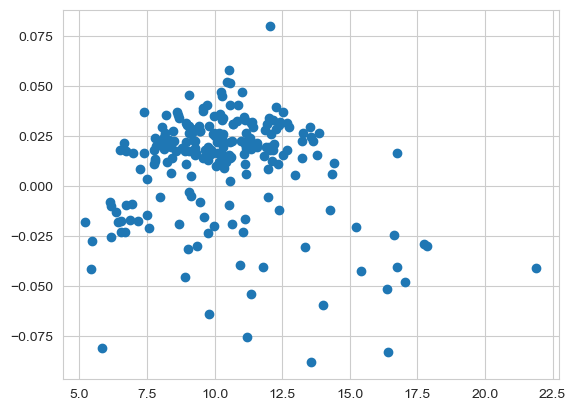

In [20]:
plt.scatter(Ref_as, D_N_s)

In [34]:
df_dt = pd.DataFrame({
    'Name': Names,
    'Ref_as': Ref_as,
    'D_N_s': D_N_s,
    'Num_s': Num_s
})

In [149]:

for k in np.linspace(2, 5, 20):

    for i in np.arange(5, 18, k):
        if i == np.arange(5, 18, k)[-1]:
            break

        df_op = df_dt[(df_dt['Ref_as'] >= i - 0.75) & (df_dt['Ref_as'] <= i + k + 0.75)]
        if len(df_op) < 10:
            continue

        X, y = df_op.Ref_as, df_op.D_N_s
        plt.scatter(X, y, alpha=0.3)

        popt, pcov = curve_fit(lin_func, X, y)
        X_r = np.arange(min(X), max(X), 0.05)
        fit_line = lin_func(X_r, *popt)
        sigma = np.sqrt(np.diag(pcov)[0] * X_r ** 2 + np.diag(pcov)[1])
        upper_bound = fit_line + sigma
        lower_bound = fit_line - sigma
        plt.plot(X_r, fit_line, label='Fit')

    df_op = df_dt[df_dt['Ref_as'] >= i - 0.5]
    X, y = df_op.Ref_as, df_op.D_N_s
    plt.scatter(X, y, alpha=0.3)

    popt, pcov = curve_fit(lin_func, X, y)
    X_r = np.arange(min(X), max(X), 0.05)
    fit_line = lin_func(X_r, *popt)
    sigma = np.sqrt(np.diag(pcov)[0] * X_r ** 2 + np.diag(pcov)[1])
    upper_bound = fit_line + sigma
    lower_bound = fit_line - sigma
    plt.plot(X_r, fit_line, label='Fit')
    plt.title(str(k))
    plt.show()

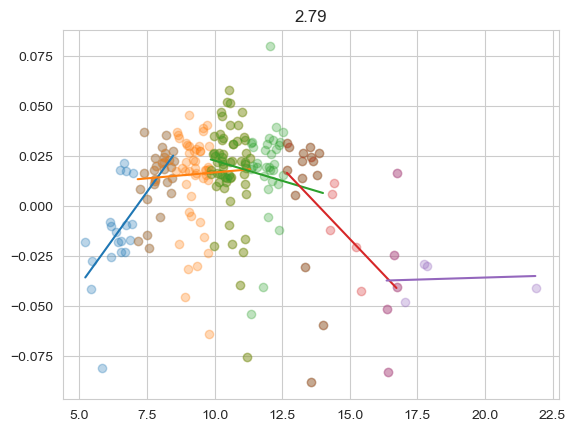

In [154]:
k = 2.79
X_l = 0
y_l = 0
int_s = []
for i in np.arange(5, 18, k):

    if i == np.arange(5, 18, k)[-1]:
        break

    df_op = df_dt[(df_dt['Ref_as'] >= i - 0.75) & (df_dt['Ref_as'] <= i + k + 0.75)]
    if len(df_op) < 10:
        continue
    X, y = df_op.Ref_as, df_op.D_N_s
    popt, pcov = curve_fit(lin_func, X, y)
    X_r = np.arange(min(X), max(X), 0.05)
    fit_line = lin_func(X_r, *popt)
    if i == 5:
        X_l = X_r
        y_l = fit_line
        int_s.append(X_r[0])
    else:
        min_p = 10
        X_i = 0
        for m in range(len(X_l)):
            for n in range(len((X_r))):
                if np.abs((X_l[m] - X_r[n]) * (y_l[m] - fit_line[n])) < min_p:
                    min_p = np.abs((X_l[m] - X_r[n]) * (y_l[m] - fit_line[n]))
                    X_i = X_l[m]
        int_s.append(X_i)
        X_l = X_r
        y_l = fit_line
    plt.scatter(X, y, alpha=0.3)
    plt.plot(X_r, fit_line, label='Fit')

df_op = df_dt[df_dt['Ref_as'] >= i - 0.5]
X, y = df_op.Ref_as, df_op.D_N_s
plt.scatter(X, y, alpha=0.3)

popt, pcov = curve_fit(lin_func, X, y)
X_r = np.arange(min(X), max(X), 0.05)
fit_line = lin_func(X_r, *popt)
min_p = 10
X_i = 0
for m in range(len(X_l)):
    for n in range(len((X_r))):
        if np.abs((X_l[m] - X_r[n]) * (y_l[m] - fit_line[n])) < min_p:
            min_p = np.abs((X_l[m] - X_r[n]) * (y_l[m] - fit_line[n]))
            X_i = X_l[m]
int_s.append(X_i)
plt.plot(X_r, fit_line, label='Fit')
plt.title(str(k))
plt.show()

In [155]:
int_s

[5.219253322908043,
 7.869253322908033,
 11.107870353314983,
 13.109164741454515,
 16.476715713076267]

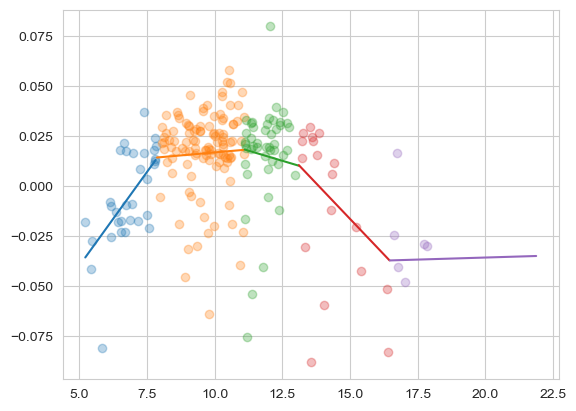

In [156]:
n = 0
k = 2.79
for i in np.arange(5, 18, k):
    if n == len(int_s) - 1:
        break

    df_op = df_dt[(df_dt['Ref_as'] >= i - 0.75) & (df_dt['Ref_as'] <= i + k + 0.75)]
    if len(df_op) < 10:
        continue
    X, y = df_op.Ref_as, df_op.D_N_s
    popt, pcov = curve_fit(lin_func, X, y)
    min_x = int_s[n]
    max_x = int_s[n + 1]
    X_r = np.arange(min_x, max_x, 0.05)
    fit_line = lin_func(X_r, *popt)
    sigma = np.sqrt(np.diag(pcov)[0] * X_r ** 2 + np.diag(pcov)[1])
    upper_bound = fit_line + sigma
    lower_bound = fit_line - sigma
    df_op = df_dt[(df_dt['Ref_as'] >= min_x) & (df_dt['Ref_as'] < max_x)]
    X, y = df_op.Ref_as, df_op.D_N_s
    plt.scatter(X, y, alpha=0.3)
    plt.plot(X_r, fit_line, label='Fit')
    n += 1

df_op = df_dt[df_dt['Ref_as'] > i - 0.5]
X, y = df_op.Ref_as, df_op.D_N_s
popt, pcov = curve_fit(lin_func, X, y)
min_x = int_s[-1]
max_x = df_op.Ref_as.max()
X_r = np.arange(min_x, max_x, 0.05)
fit_line = lin_func(X_r, *popt)
sigma = np.sqrt(np.diag(pcov)[0] * X_r ** 2 + np.diag(pcov)[1])
upper_bound = fit_line + sigma
lower_bound = fit_line - sigma
df_op = df_dt[(df_dt['Ref_as'] >= min_x) & (df_dt['Ref_as'] < max_x)]
X, y = df_op.Ref_as, df_op.D_N_s
plt.scatter(X, y, alpha=0.3)
plt.plot(X_r, fit_line, label='Fit')
n += 1

plt.show()

In [70]:
df_dt['Ref_as'].min(), df_dt['Ref_as'].max()

(5.219253322908043, 21.892471917501236)

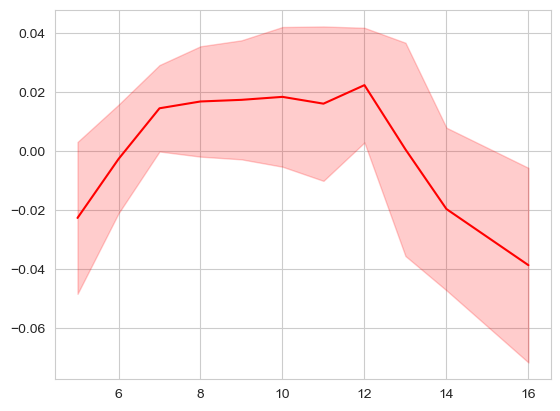

In [128]:
X = []
y = []
u_bond = []
l_bond = []
for i in np.arange(5, 21, 1):

    df_op = df_dt[(df_dt['Ref_as'] >= i) & (df_dt['Ref_as'] < i + 1.5)]
    if len(df_op) < 5:
        continue

    X.append(i)
    y.append(df_op['D_N_s'].mean())
    u_bond.append(df_op['D_N_s'].mean() + df_op['D_N_s'].std())
    l_bond.append(df_op['D_N_s'].mean() - df_op['D_N_s'].std())

plt.plot(X, y, color='r')
plt.fill_between(X, u_bond, l_bond, color='r', alpha=0.2)



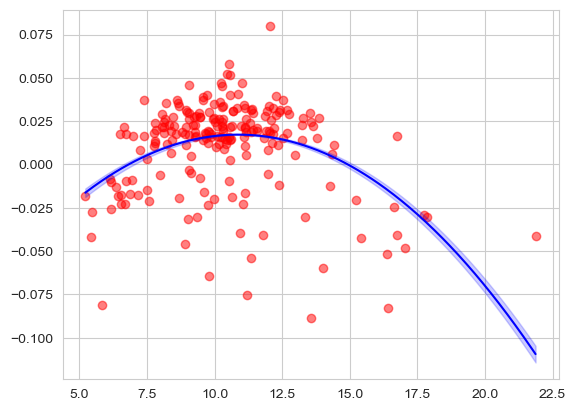

In [160]:
X, y = df_dt.Ref_as, df_dt.D_N_s
popt, pcov = curve_fit(quadratic, X, y)
X_r = np.arange(min(X), max(X), 0.05)
fit_line = quadratic(X_r, *popt)
upper_bound = fit_line.copy()
lower_bound = fit_line.copy()
for i in np.linspace(0, pcov[1, 1], num=50):
    popt_h = popt.copy()
    popt_h[1] += 2 * i
    fit_line_d = quadratic(X_r, *popt_h)

    upper_bound = np.max(np.array([upper_bound, fit_line_d]), axis=0)
    lower_bound = np.min(np.array([lower_bound, fit_line_d]), axis=0)

    popt_l = popt.copy()
    popt_l[1] -= 2 * i
    fit_line_d = quadratic(X_r, *popt_l)

    upper_bound = np.max(np.array([upper_bound, fit_line_d]), axis=0)
    lower_bound = np.min(np.array([lower_bound, fit_line_d]), axis=0)

plt.scatter(X, y, color='red',alpha=0.5)
plt.plot(X_r, fit_line, label='Fit', color='b')
plt.fill_between(X_r, lower_bound, upper_bound, color='b', alpha=0.2)
#plt.xlim((int_s[0],int_s[-1]))

plt.show()

In [141]:
int_s

[5.219253322908043,
 7.769253322908034,
 10.827811559577098,
 12.98633785517188,
 17]

In [84]:
popt

array([-1.04802247e-03,  1.08745614e+01,  1.72391320e-02])

In [85]:
pcov

array([[ 2.05575281e-08, -1.21234400e-05, -1.49199849e-07],
       [-1.21234400e-05,  1.03910516e-01,  1.94199329e-04],
       [-1.49199849e-07,  1.94199329e-04,  3.89296684e-06]])

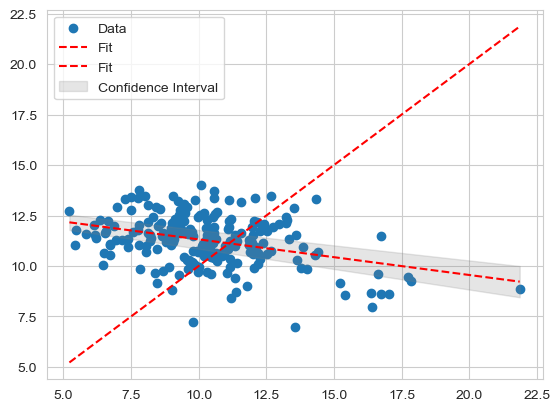

In [32]:
X, y = Ref_as, Num_s
popt, pcov = curve_fit(lin_func, X, y)
X_r = np.arange(min(X), max(X), 0.05)
fit_line = lin_func(X_r, *popt)
sigma = np.sqrt(np.diag(pcov)[0] * X_r ** 2 + np.diag(pcov)[1])
upper_bound = fit_line + sigma
lower_bound = fit_line - sigma

plt.scatter(X, y, label='Data')
plt.plot(X_r, fit_line, 'r--', label='Fit')
plt.plot(X_r, X_r, 'r--', label='Fit')
plt.fill_between(X_r, lower_bound, upper_bound, color='gray', alpha=0.2, label='Confidence Interval')

plt.legend()
plt.show()


In [29]:
X_r[np.abs(fit_line - X_r).argmin()]

11.119253322908023

In [2]:
df_demo = pd.read_csv("./data/age_kw/acoustics_age_kw.csv")
df_demo

,id,oid,time,ref_num,cite_num,dvalue,avg_ref,avg_cite,kw
0,103869,2314544796,1940,5,1,1,-2.200000,9.0,"[24890656, 41008148]"
1,365775,2301073940,1940,7,1,1,-6.000000,74.0,"[104892082, 192562407, 207768971, 24890656, 65..."
2,487260,78531053,1940,1,9,0,-17.000000,38.0,"[166504685, 127413603, 199639397, 154954056, 2..."
3,647621,2318298516,1940,2,0,1,-3.000000,0.0,"[39432304, 24890656, 158613193]"
4,686936,804158348,1940,8,1,0,-4.750000,9.0,"[2779372316, 24890656, 203311528, 171912257, 1..."
...,...,...,...,...,...,...,...,...,...
666200,7962813,2406446185,2015,15,0,1,-19.333333,0.0,"[56318395, 24890656, 64922751, 127413603]"
666201,7962991,2879492182,2015,4,0,1,-7.250000,0.0,"[24890656, 31310117, 192562407]"
666202,7963166,2004238225,2015,35,1,0,-5.485714,3.0,"[80640880, 141354745, 101518730, 198394728, 11..."
666203,7963222,2815665522,2015,3,1,1,-3.333333,2.0,"[2993177591, 523889960, 24890656, 2991944630, ..."


In [3]:
df_demo = pd.read_csv("./data/age_kw/agricultural_economics_age_kw_stacked.csv")
df_demo

,Unnamed: 0,id,oid,time,ref_num,cite_num,dvalue,avg_ref,avg_cite,kw,new_kw,new_kw_n
0,17,10359,2314258377,1941,5,1,1,-4.200000,1.000000,[ 6803240 18518473 8824518 98731567],1,2
1,18,20730,1991589498,1941,3,9,0,-10.333333,22.000000,[ 8824518 71250308 983068823 16188536 98780...,1,5
2,19,24008,2622485855,1941,3,0,1,-8.000000,0.000000,[ 1547014 8824518 45097563 2741360],1,3
3,20,61424,2795799236,1941,6,3,0,-1.500000,24.666667,[ 2936327 8341921 778083465 270623 882...,1,8
4,21,156305,2795623164,1941,4,4,1,-6.250000,34.250000,[ 249254 12197492 7122089 8824518 90875...,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
63240,63257,1240232,2207679528,2015,24,0,1,-26.478261,0.000000,[ 480397 42077812 9271019 779739803 6232...,0,0
63241,63258,1240235,2336271010,2015,5,1,1,-15.200000,4.000000,[ 6204764 88402356 49605437 28383755 8824518 ...,0,0
63242,63259,1240400,2107977288,2015,30,12,0,-4.896552,2.583333,[ 23966790 780289900 26322002 777351106 24...,0,0
63243,63260,1240467,836496205,2015,2,0,1,-6.000000,0.000000,[ 8199923 776935417 8824518 6637286 6232...,1,1
